In [100]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
import torch 
from torch import nn

In [102]:
import torch.nn.functional as F

Let's say we have a classification task with 4 classes. And our model gives these scores(logits) as the output. 

## Activation functions

In [103]:
x = torch.randn(4)

In [104]:
x

tensor([-1.5874, -1.7568, -0.0789,  2.1428])

In [105]:
log_soft = nn.LogSoftmax()
soft = nn.Softmax()

In [106]:
log_soft(x)        #Log softmax

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([-3.8723, -4.0417, -2.3637, -0.1421])

In [107]:
soft(x)           #softmax

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([0.0208, 0.0176, 0.0941, 0.8676])

In [108]:
x

tensor([-1.5874, -1.7568, -0.0789,  2.1428])

In [109]:
exp_x = np.exp(x)
exp_x_sum = exp_x.sum()

In [110]:
exp_x_sum

tensor(9.8243)

In [111]:
exp_x

tensor([0.2045, 0.1726, 0.9242, 8.5231])

In [112]:
exp_x/exp_x_sum              # softmax

tensor([0.0208, 0.0176, 0.0941, 0.8676])

## Losses

Losses 
Losses are calculated for all the input examples. Let's say we have 4 inputs and only 2 classes. All the four values are probability values. The overall probability is the product of all 4 values. This results in a very small value. That is why we apply log function which converts multiplication to addition and also this is practical for computations. 

In [113]:
# All are probability values
y_out_modelA = [0.2, 0.7, 0.6, 0.1]  # Two images are not classified correctly.
y_out_modelB = [0.7, 0.9, 0.6, 0.8]  # All images are classified correctly.

Two events A and B:
P(A) = 1 - P(B)

In [114]:
np.prod(y_out_modelA)

0.0084

In [115]:
np.prod(y_out_modelB)

0.3024

In [116]:
np.log(y_out_modelA)                   # all are negative values 

array([-1.60943791, -0.35667494, -0.51082562, -2.30258509])

In [118]:
-np.log(np.prod(y_out_modelA))         # loss of model A

4.779523573132869

In [119]:
-np.log(np.prod(y_out_modelB))         # loss of model B

1.1960046346767592

## Cross entropy 

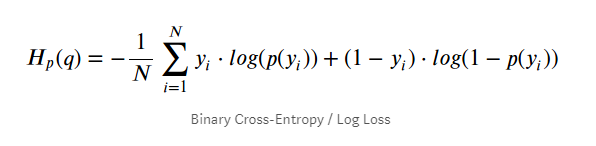

In [120]:
#loss = nn.NLLLoss()
loss = nn.CrossEntropyLoss()

In [121]:
netwrk_output = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)

In [122]:
loss(netwrk_output,target)

tensor(1.4629, grad_fn=<NllLossBackward>)

### Raw scores (logits) >>> log(probability values) >>> negative of the log >>> Loss    ------- Cross entropy

### log(probability values) >>> negative of the log >>> Loss    ------- NLLLoss